# An Introduction to the GCol Library

In this chapter, we demonstrate the functionality of the ``gcol`` library's routines using both textual and graphical output. If you have not done so already, the ``gcol`` library should first be installed by typing the following at the command line: ``python -m pip install gcol``, or executing the following command in a notebook: ``!python -m pip install gcol``, and then restarting the kernel. 

Let us first review some basic terminology in graph theory.

* A [graph](https://en.wikipedia.org/wiki/Graph_(discrete_mathematics)) is an object comprising a set of nodes that are linked by edges. They can be visualized in diagram form, as shown below. Graphs are sometimes known as *networks*; nodes are sometimes called *vertices*.
* A [node coloring](https://en.wikipedia.org/wiki/Graph_coloring) of a graph is an assignment of colors to nodes so that all pairs of adjacent nodes have different colors. The aim is to use as few colors as possible. The smallest number of colors needed to color the nodes of a graph $G$ is known as the graph's chromatic number, denoted by $\chi(G)$. Identifying $\chi(G)$ is NP-hard.
* An [edge coloring](https://en.wikipedia.org/wiki/Edge_coloring) of a graph is an assignment of colors to edges so that all pairs of adjacent edges have different colors (a pair of edges is considered adjacent if and only if they share a common endpoint). The aim is to use as few colors as possible. The smallest number of colors needed to color the edges of a graph $G$ is known as the graph's chromatic index, denoted by $\chi'(G)$. According to Vizing's theorem, $\chi'(G)$ is either $\Delta(G)$ or $\Delta(G) + 1$, where $\Delta(G)$ is the maximum degree in $G$. However, identifying $\chi'(G)$ is still NP-hard.
*  A face coloring of a planar graph is an assignment of colors to one of its [planar embeddings](https://en.wikipedia.org/wiki/Planar_graph) so that all pairs of adjacent faces have different colors. The aim is to use as few colors as possible. According to [Euler's formula](https://en.wikipedia.org/wiki/Planar_graph#Euler's_formula), an embedding of a planar graph with $n$ nodes and $m$ edges has exactly $m-n+2$ faces, including the external face. The smallest number of colors needed to color the faces of a planar embedding is known as its face chromatic number. Due to the [Four Color Theorem](https://en.wikipedia.org/wiki/Four_color_theorem), the face chromatic number is always less than or equal to four. The problem of determining a face four-coloring of a graph is polynomially solvable; however, determining whether or not the face chromatic number of a graph is three is NP-complete. Note that face colorings only exist in graphs that have a planar embedding. A graph has a planar embedding if and only if it is planar.
* In the [node precoloring](https://en.wikipedia.org/wiki/Precoloring_extension) problem, some of the nodes have already been assigned colors. The aim is to allocate colors to the remaining nodes so that we get a full coloring that uses a minimum number of colors. The same concepts apply for the edge precoloring problem and face precoloring problem. The problem is NP-hard.
* In the [list coloring](https://en.wikipedia.org/wiki/List_coloring) problem, each node of the graph is associated with a list of *allowed colors*. The aim is to allocate colors to all nodes so that adjacent nodes have different colors, and each node has a color belonging to its list of allowed colors. Again, the same concepts apply for the edge list coloring problem and face list coloring problem. The problem is also NP-hard.

## Getting Started

We start by importing the libraries we need. The ``networkx`` library is used to generate and visualize the graphs, the ``matplotlib.pyplot`` is used to render the drawings, and the ``gcol`` library contains all of our graph coloring routines. 

In [1]:
import networkx as nx              # python library for graph theory
import matplotlib.pyplot as plt    # python library for visualization  
import gcol                        # the gcol library

## Node Coloring and Visualization

Having imported the relevant libraries, the following code generates a [dodecahedron graph](https://en.wikipedia.org/wiki/Regular_dodecahedron) and draws it to the screen.

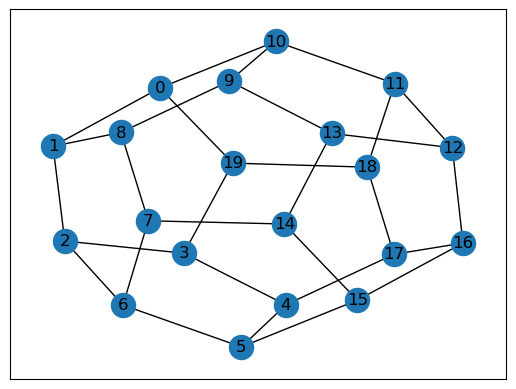

In [2]:
G = nx.dodecahedral_graph()
nx.draw_networkx(G, pos=nx.spring_layout(G, seed=1))
plt.show()

Now that we have defined a graph, we can easily color it using ``gcol``'s routines. The example below shows how to do this. Some information about this coloring is then written to the screen, along with a visualization. The colors of the nodes are held in the dictionary ``c``, using the integers ``0,1,2,...`` as color labels. We can also write the coloring as a partition, which groups all nodes of the same color. Note that pairs of adjacent nodes are always assigned to different colors, as required.

Here is a node coloring of the above graph: {0: 0, 1: 1, 19: 1, 10: 1, 2: 0, 3: 2, 8: 0, 9: 2, 18: 0, 11: 2, 6: 1, 7: 2, 4: 0, 5: 2, 13: 0, 12: 1, 14: 1, 15: 0, 16: 2, 17: 1}
The number of colors in this solution is: 3
Here is the same solution, expressed as a partition of the nodes: [[0, 2, 4, 8, 13, 15, 18], [1, 6, 10, 12, 14, 17, 19], [3, 5, 7, 9, 11, 16]]
Here is a picture of the coloring:


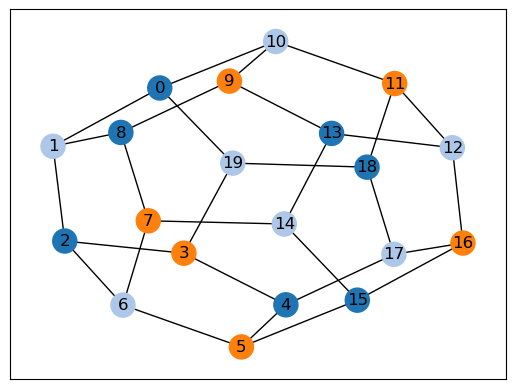

In [3]:
G = nx.dodecahedral_graph()
c = gcol.node_coloring(G)
print("Here is a node coloring of the above graph:", c)
print("The number of colors in this solution is:", max(c.values()) + 1)
print("Here is the same solution, expressed as a partition of the nodes:", gcol.partition(c))
print("Here is a picture of the coloring:")
nx.draw_networkx(
    G, 
    pos=nx.spring_layout(G, seed=1), 
    node_color=gcol.get_node_colors(G, c)
)
plt.show()

We can also write similar commands to determine the chromatic number, chromatic index, and face chromatic number of this graph.

In [4]:
print("The chromatic number of this graph is:", gcol.chromatic_number(G))
print("The chromatic index of this graph is:", gcol.chromatic_index(G))
print("The face chromatic number of this graph is:", gcol.face_chromatic_number(G))

The chromatic number of this graph is: 3
The chromatic index of this graph is: 3
The face chromatic number of this graph is: 4


Above, we are allowed to use the ``gcol.face_chromatic_number()`` method, because the graph can be represented as a [planar embedding](https://en.wikipedia.org/wiki/Planar_graph). (If the graph does not have a planar embedding, an error will be raised.) Here is an example planar embedding. This is merely a positioning of the nodes so that no edges cross in the resultant visualization.

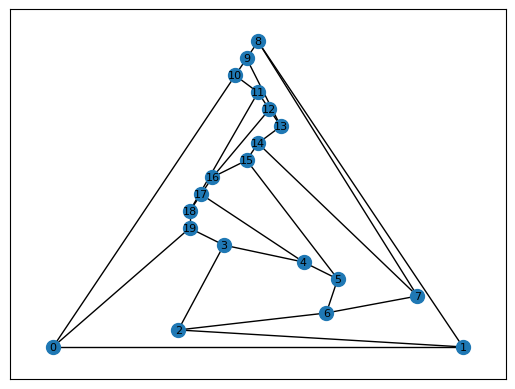

In [5]:
G = nx.dodecahedral_graph()
nx.draw_networkx(
    G, 
    pos=nx.planar_layout(G),
    node_size=100, 
    font_size=8
)
plt.show()

Observe that, although it looks different, this graph is equivalent to the graph shown in the previous figure. 

We now show a node coloring of a slightly larger example, the so-called [Hoffman-Singleton graph](https://en.wikipedia.org/wiki/Hoffman%E2%80%93Singleton_graph). This has 50 nodes, 175 edges and, as shown, a chromatic number of four.

The number of colors in this solution is: 4


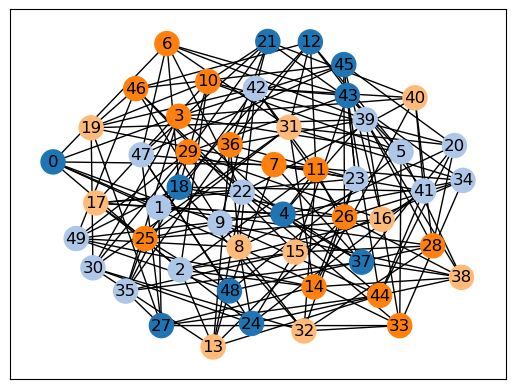

In [6]:
G = nx.hoffman_singleton_graph()
c = gcol.node_coloring(G, opt_alg=1)
print("The number of colors in this solution is:", max(c.values()) + 1)
nx.draw_networkx(
    G, 
    pos=nx.spring_layout(G, seed=1), 
    node_color=gcol.get_node_colors(G, c)
)
plt.show()

To some, this visualization might seem quite cluttered; however, steps can be taken to remedy this, as we will see in the next chapter.

## Edge Coloring and Visualization

The following example shows how we can use the ``gcol`` library to color the edges of a graph. As we have discussed, in edge coloring the maximum degree $\Delta(G)$ in the graph $G$ gives a lower bound on the chromatic index $\chi'(G)$. Since $\Delta(G)=3$ and an edge-3-coloring has been determined, we can conclude that the solution produced is optimal.

Here is the color of each edge: {(11, 12): 0, (11, 18): 1, (10, 11): 2, (12, 16): 1, (12, 13): 2, (18, 19): 0, (17, 18): 2, (16, 17): 0, (4, 17): 1, (15, 16): 2, (0, 10): 0, (9, 10): 1, (9, 13): 0, (8, 9): 2, (13, 14): 1, (14, 15): 0, (5, 15): 1, (7, 14): 2, (0, 19): 1, (3, 19): 2, (0, 1): 2, (3, 4): 0, (2, 3): 1, (1, 2): 0, (2, 6): 2, (5, 6): 0, (4, 5): 2, (1, 8): 1, (6, 7): 1, (7, 8): 0}
Here is the same solution, expressed as a partition of the edges: [[(0, 10), (1, 2), (11, 12), (14, 15), (16, 17), (18, 19), (3, 4), (5, 6), (7, 8), (9, 13)], [(0, 19), (1, 8), (11, 18), (12, 16), (13, 14), (2, 3), (4, 17), (5, 15), (6, 7), (9, 10)], [(0, 1), (10, 11), (12, 13), (15, 16), (17, 18), (2, 6), (3, 19), (4, 5), (7, 14), (8, 9)]]
Maximum degree   = 3
Number of colors = 3


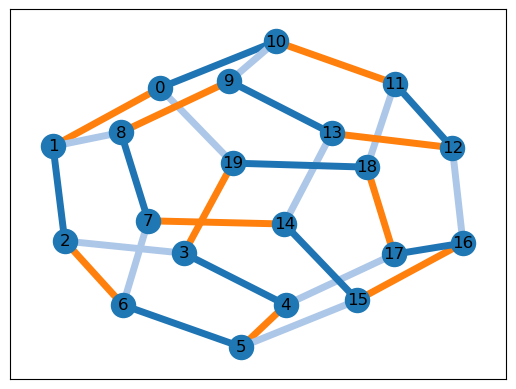

In [7]:
G = nx.dodecahedral_graph()
c = gcol.edge_coloring(G)
print("Here is the color of each edge:", c)
print("Here is the same solution, expressed as a partition of the edges:", gcol.partition(c))
print("Maximum degree   =", max(G.degree(v) for v in G))
print("Number of colors =", max(c.values()) + 1)
nx.draw_networkx(
    G, 
    pos=nx.spring_layout(G, seed=1), 
    edge_color=gcol.get_edge_colors(G, c), 
    width=5
)

Here is another example using a [complete graph](https://en.wikipedia.org/wiki/Complete_graph). Edge coloring in complete graphs has applications in [sports league scheduling](https://rhydlewis.eu/papers/sportsPaper.pdf).

Maximum degree   = 19
Number of colors = 19


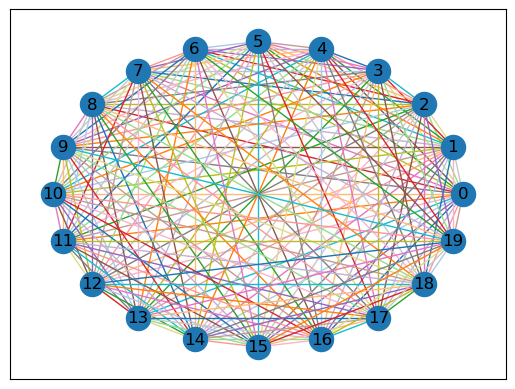

In [8]:
G = nx.complete_graph(20)
c = gcol.edge_coloring(G, opt_alg=1)
print("Maximum degree   =", max(G.degree(v) for v in G))
print("Number of colors =", max(c.values()) + 1)
nx.draw_networkx(
    G, 
    pos=nx.circular_layout(G), 
    edge_color=gcol.get_edge_colors(G, c)
)

## Face Coloring and Visualization

As noted earlier, a face coloring is an assignment of colors to each face in a [planar embedding](https://en.wikipedia.org/wiki/Planar_graph) so that all pairs of adjacent faces have different colors. Since non-planar graphs do not have planar embeddings, the following routines are only suitable for planar graphs. Planar graphs featuring [bridges](https://en.wikipedia.org/wiki/Bridge_(graph_theory)) are also disallowed, as these give faces that are adjacent to themselves. In the ``gcol`` library, face colorings of an embedding are determined by node-coloring its [dual graph](https://en.wikipedia.org/wiki/Dual_graph).

Below, we generate a two-dimensional [grid graph](https://en.wikipedia.org/wiki/Lattice_graph) ``G``. In the dictionary ``pos``, we also specify suitable $(x,y)$ coordinates for each node. These positions define the planar embedding. After determining a face coloring ``c``, it is drawn to the screen using the ``gcol.draw_face_coloring()`` method. By default, the external face is not colored in the first visualization; however, we can change this by setting ``external=True``, as shown in the second figure. The second figure also shows how the original graph can be added to the image to show the boundaries of each face.

Here, the regular structure of grid graphs has allowed us to easily generate positions for each node. In some cases, however, a method of doing this may not be obvious. The third example therefore demonstrates how positions for each node can be determined using the NetworkX command ``nx.planar_layout()``. This arranges the nodes in a mountain-like shape. 

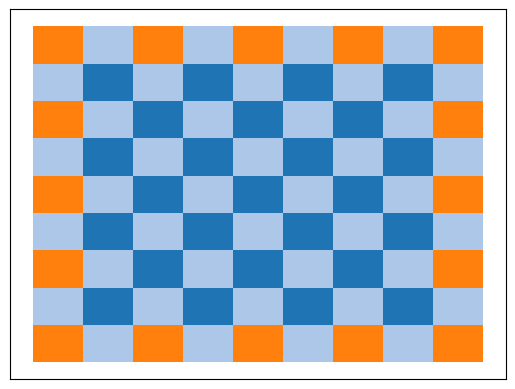

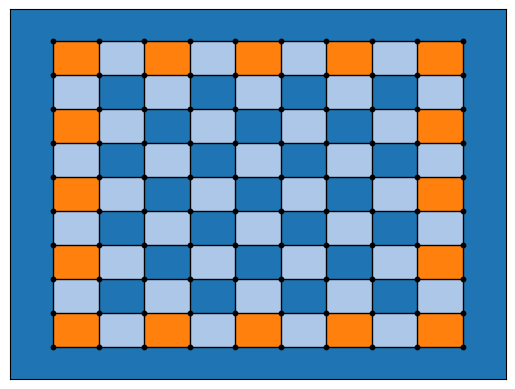

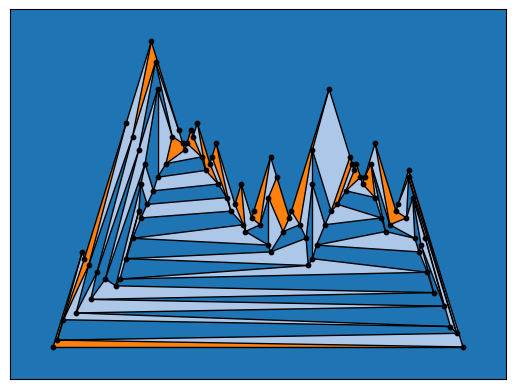

Face chromatic number = 3


In [9]:
G = nx.grid_2d_graph(10, 10)
pos = dict((u, u) for u in G.nodes())
c = gcol.face_coloring(G, pos)

gcol.draw_face_coloring(c, pos)

gcol.draw_face_coloring(c, pos, external=True)
nx.draw_networkx(
    G,
    pos=pos,
    node_color='k',
    node_size=10,
    with_labels=False
)
plt.show()

pos = nx.planar_layout(G)
c = gcol.face_coloring(G, pos)
gcol.draw_face_coloring(c, pos, external=True)
nx.draw_networkx(
    G,
    pos=pos,
    node_color='k',
    node_size=10,
    with_labels=False
)
plt.show()
print("Face chromatic number =", gcol.face_chromatic_number(G))

The next example shows how we can use these routines to four-color the departments of France using the data from the file [france.txt](https://github.com/Rhyd-Lewis/GCol/blob/main/docs/demo/france.txt). Here, each node is assigned the attribute ``pos``, so the command ``nx.get_node_attributes()`` is used to form the positions dictionary.

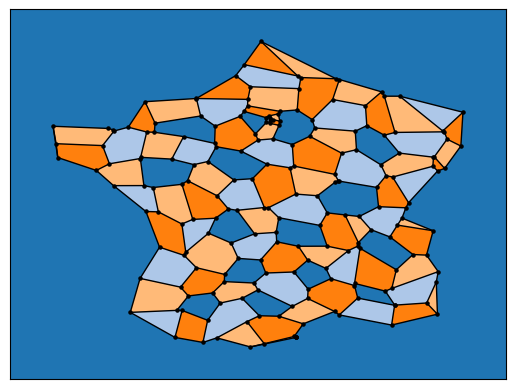

In [10]:
G = nx.Graph()
with open("france.txt", "r") as f:
    f.readline()
    n = int(f.readline())
    for i in range(n):
        L = f.readline().split(" ")
        G.add_node(i, pos=(float(L[0]),float(L[1])))
        for j in range(2, len(L)):
            G.add_edge(i, int(L[j]))

pos = nx.get_node_attributes(G, "pos")
c = gcol.face_coloring(G, pos, opt_alg=1)
gcol.draw_face_coloring(c, pos, external=True)
nx.draw_networkx(
    G,
    pos=pos,
    node_color='k',
    node_size=5,
    with_labels=False
)
plt.show()

## Precoloring

As mentioned earlier, in the node precoloring problem some of the nodes have already been assigned colors. The aim is to assign colors to the remaining nodes so that we get a full coloring that uses a minimum number of colors. In the following example, the dictionary ``P`` is used to assign nodes 0, 1, 8, 9 and 10 to colors 0, 1, 2, 3, and 1, respectively. This partial coloring is then shown, together with a corresponding full coloring. 

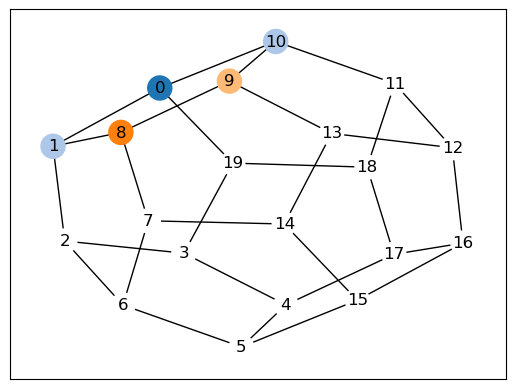

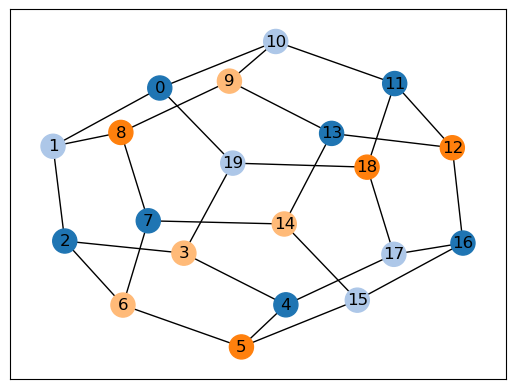

In [11]:
G = nx.dodecahedral_graph()
P = {0:0, 1:1, 8:2, 9:3, 10:1}
nx.draw_networkx(
    G, 
    pos=nx.spring_layout(G, seed=1), 
    node_color=gcol.get_node_colors(G, P)
)
plt.show()

c = gcol.node_precoloring(G, P, strategy="random", opt_alg=2, it_limit=100)
nx.draw_networkx(
    G, 
    pos=nx.spring_layout(G, seed=1), 
    node_color=gcol.get_node_colors(G, c)
)
plt.show()

A similar process can also be followed for edge precoloring, which the following example demonstrates.

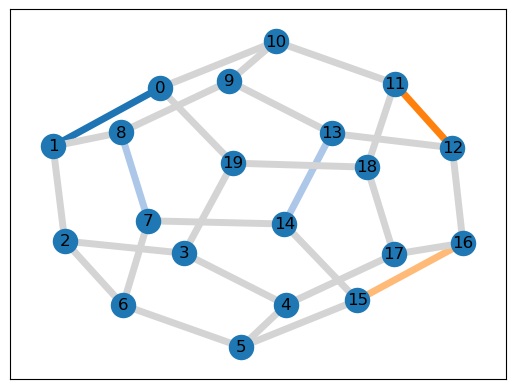

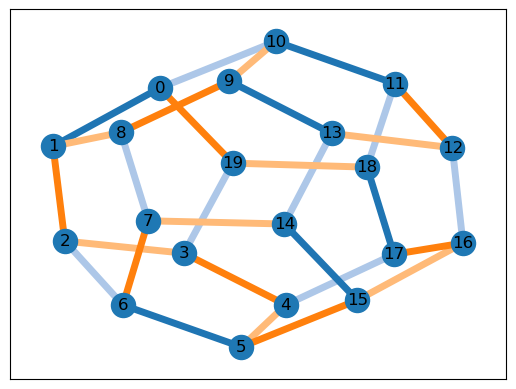

In [12]:
G = nx.dodecahedral_graph()
P = {(0, 1): 0, (7, 8): 1, (13, 14): 1, (11, 12): 2, (15, 16): 3}
nx.draw_networkx(
    G, 
    pos=nx.spring_layout(G, seed=1), 
    edge_color=gcol.get_edge_colors(G, P), 
    width=5
)
plt.show()

c = gcol.edge_precoloring(G, P, strategy="random", opt_alg=2, it_limit=100)
nx.draw_networkx(
    G, 
    pos=nx.spring_layout(G, seed=1), 
    edge_color=gcol.get_edge_colors(G, c), 
    width=5
)
plt.show()

We can also precolor the faces of a planar embedding. To do this we follow the same process as the previous examples, though precolored faces are now identified by their sequences of surrounding nodes. As the example below demonstrates, each internal face in a planar embedding is characterized by the series of nodes that surround it *in a counterclockwise direction*. Similarly, the one external face is identified by the series of nodes traveling in *a clockwise direction*. 

The following example creates a 20-node planar graph. It then precolors the external face ``(0, 2, 3, 1)`` with color 1, the internal face ``(6, 9, 7)`` with color 2, and the internal face ``(16, 17, 19)`` with color 3.

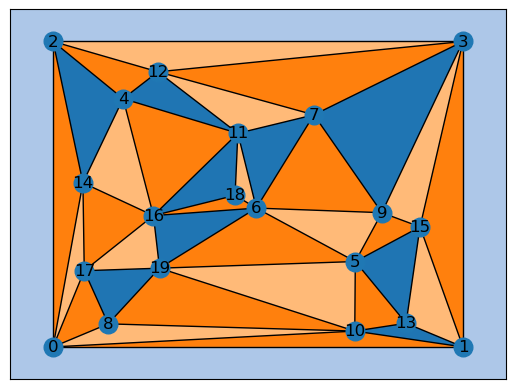

In [13]:
def make_planar_graph(n, seed=None):
    # Function for making a dense planar graph by placing nodes randomly
    # into the unit square, including corners
    assert n >= 4, "n parameter must be at least 4"
    import random
    from scipy.spatial import Delaunay
    random.seed(seed)
    P = [(0,0), (1,0), (0,1), (1, 1)]
    for i in range(4, n):
        P.append((random.uniform(0.05,0.95), random.uniform(0.05,0.95)))
    T = Delaunay(P).simplices.copy()
    G = nx.Graph()
    for v in range(n):
        G.add_node(v, pos=(P[v][0], P[v][1]))
    for x, y, z in T:
        G.add_edges_from([(x, y), (x, z), (y, z)])
    return G

G = make_planar_graph(20, seed=1)
pos = nx.get_node_attributes(G, "pos")
P = {(0, 2, 3, 1): 1, (6, 9, 7): 2, (16, 17, 19): 3}
c = gcol.face_precoloring(G, pos, P, opt_alg=1)
gcol.draw_face_coloring(c, pos, True)
nx.draw_networkx(G, pos=pos, node_size=180, with_labels=True)
plt.show()

## Solving Sudoku

Node precoloring can also be used to solve [sudoku puzzles](https://en.wikipedia.org/wiki/Sudoku). The objective in sudoku is to fill a $d^2 \times d^2$ grid with digits so that each column, each row, and each of the $d \times d$ boxes contain all digits from $0$ to $d^2-1$. The puzzle comes with some of the cells filled. The player then needs to fill the remaining cells while satisfying the above constraints. Here is an example puzzle using $d=3$ and the digits $0,1,\ldots,8$. Blank cells are marked by dots.

$$
\begin{pmatrix}
. & . & . & . & 5 & . & . & . & . \\ 
. & . & 8 & . & 1 & . & . & . & . \\
. & . & . & . & . & . & . & 1 & 2 \\ 
. & 7 & . & . & . & 2 & . & . & . \\ 
. & . & . & 6 & . & . & . & . & . \\ 
. & 4 & . & . & . & 0 & . & 3 & . \\ 
. & 5 & . & . & . & . & . & . & . \\ 
. & . & . & . & 2 & . & 6 & . & . \\ 
. & . & . & . & . & . & . & 2 & .
\end{pmatrix}
$$

Sudoku puzzles can be solved by first forming a [sudoku graph](https://en.wikipedia.org/wiki/Sudoku_graph), which uses a node for each cell in the grid. Edges in this graph occur between all pairs of nodes in the same column, row or box. Finally, we use the filled cells in the puzzle to precolor the correct nodes. The puzzle is then solved by coloring the remaining nodes using $d^2$ colors. The following code shows how to solve the above puzzle.

Here is the sudoku puzzle from above


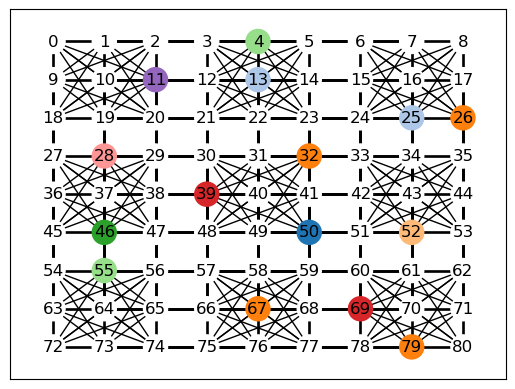

Here is its solution. Number of colors = 9


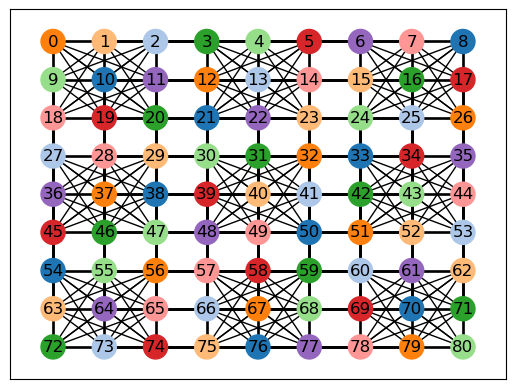

In [14]:
# Function for laying out the nodes of a (d**2 x d**2)-node sudoku puzzle 
def sudoku_layout(G, d):
    pos = {}
    u = 0
    for i in range(d**2):
        for j in range(d**2):
            pos[u]=(j,-i)
            u += 1
    return pos

G = nx.sudoku_graph(3)
P = {4:5, 11:8, 13:1, 25:1, 26:2, 28:7, 32:2, 39:6, 46:4, 50:0, 52:3, 55:5, 67:2, 69:6, 79:2}
print("Here is the sudoku puzzle from above")
nx.draw_networkx(
    G, 
    pos=sudoku_layout(G, 3), 
    node_color=gcol.get_node_colors(G, P)
)
plt.show()

c = gcol.node_precoloring(G, P, opt_alg=1)
print("Here is its solution. Number of colors =", max(c.values()) + 1)
nx.draw_networkx(
    G, 
    pos=sudoku_layout(G, 3), 
    node_color=gcol.get_node_colors(G, c)
)
plt.show()

## List Coloring

In the node [list coloring](https://en.wikipedia.org/wiki/List_coloring) problem, each node has a list of *allowed colors*. The aim is to color each node with one of its allowed colors while ensuring that adjacent nodes always have different colors.

In the following example, the dictionary ``A`` defines the allowed colors for each node in the graph ``G``. (Node ``0``, for example, can only be assigned to colors ``1`` or ``2``.). This particular problem instance is solvable, as the output demonstrates.

Allowed colors A = {0: [1, 2], 1: [0, 1], 2: [0, 1], 3: [3, 1], 4: [3, 0], 5: [0, 1], 6: [0, 1], 7: [3, 2], 8: [0, 2], 9: [3, 1], 10: [1, 2], 11: [0, 1], 12: [0, 3], 13: [0, 2], 14: [0, 1], 15: [1, 3], 16: [0, 2], 17: [1, 3], 18: [3, 2], 19: [1, 3]}
Solution c= {1: 0, 2: 1, 8: 2, 3: 3, 6: 0, 7: 3, 4: 0, 19: 1, 5: 1, 15: 3, 0: 2, 10: 1, 11: 0, 12: 3, 9: 3, 14: 0, 13: 2, 17: 1, 16: 2, 18: 2}


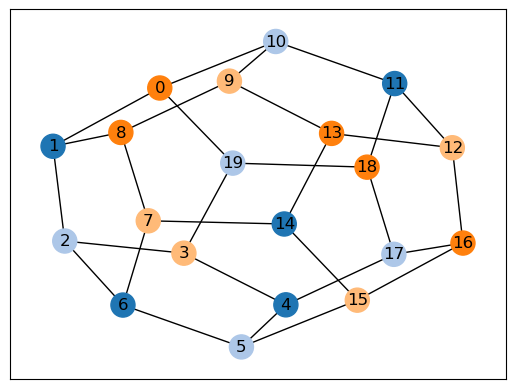

In [15]:
import random
random.seed(1)
G = nx.dodecahedral_graph()
A = {v: random.sample([0, 1, 2 ,3], 2) for v in G}
c = gcol.node_list_colouring(G, allowed_cols=A, opt_alg=1)
print("Allowed colors A =", A)
print("Solution c=", c)
nx.draw_networkx(
    G, 
    pos=nx.spring_layout(G, seed=1), 
    node_color=gcol.get_node_colors(G, c)
)

List coloring can also be performed on the edges and faces of a graph. If the defined problem instance cannot be solved (that is, the lists of allowed colors are too restrictive), then a ``ValueError`` is raised.

## $k$-Coloring

The $k$-coloring problem is a version of the graph coloring problem where the desired number of colors $k$ is stated beforehand by the user. For node coloring, if $k<\chi(G)$, then no solution is possible; for edge coloring, if $k < \chi'(G)$, then no solution is possible. Several variants of the $k$-coloring problem can be formulated, including equitable coloring and weighted graph coloring, using both weighted and unweighted graphs. Examples are considered below.

In the following example, we make use of ``gcol.node_k_coloring()`` method to produce node $k$-colorings of a [random](https://en.wikipedia.org/wiki/Erd%C5%91s%E2%80%93R%C3%A9nyi_model) $G(n,p)$ graph. These graphs are generated by taking $n$ nodes and then adding an edge between each pair of nodes at random with probability $p$. Here we use $n=100$ and $p=0.05$ with $k=6$, $5$, and $4$. For values of $k<4$, solutions are not possible and a ``ValueError`` will  be returned.

Here is a node 6 -coloring of G:


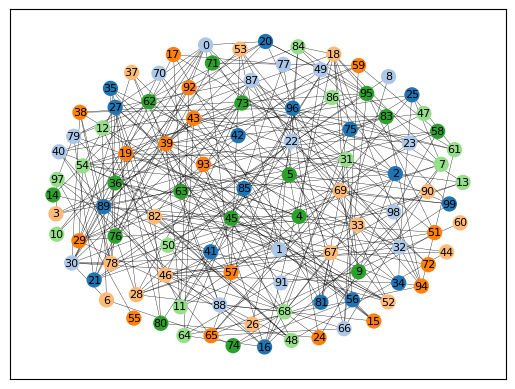

Here is a node 5 -coloring of G:


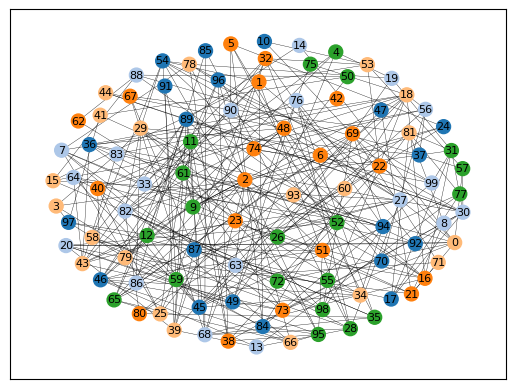

Here is a node 4 -coloring of G:


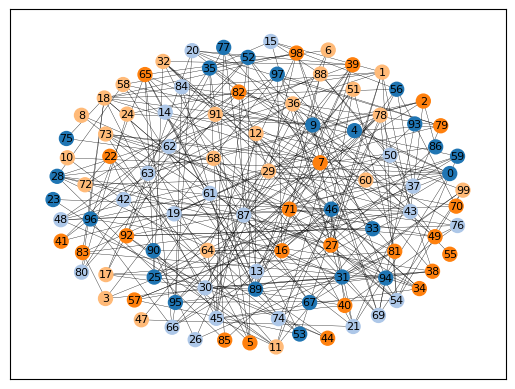

In [16]:
G = nx.gnp_random_graph(100, 0.05, seed=1)

for k in [6, 5, 4]:
    c = gcol.node_k_coloring(G, k, opt_alg=2, it_limit=1000)
    print("Here is a node", k, "-coloring of G:")
    nx.draw_networkx(
        G, 
        pos=nx.arf_layout(G), 
        node_color=gcol.get_node_colors(G, c), 
        node_size=100, 
        font_size=8, 
        width=0.25
    )
    plt.show()

The following shows a similar process for edge $k$-coloring.

Here is an edge 5 -coloring of G:


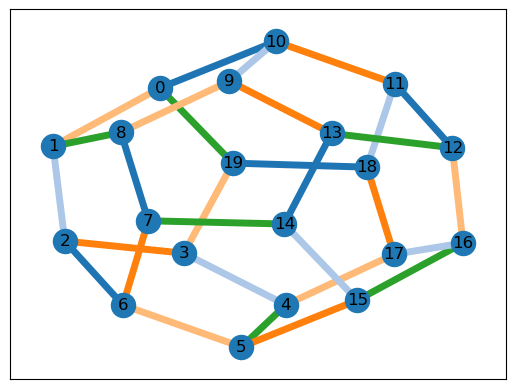

Here is an edge 4 -coloring of G:


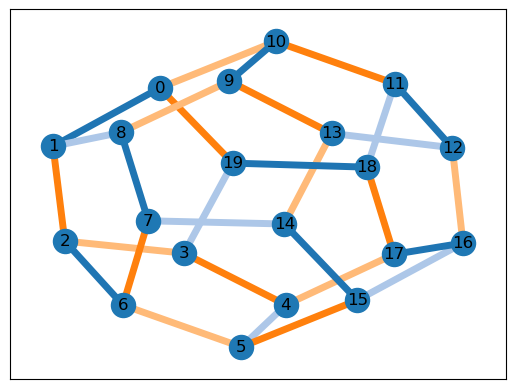

Here is an edge 3 -coloring of G:


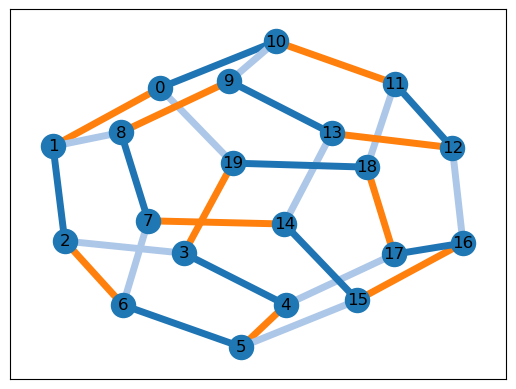

In [17]:
G = nx.dodecahedral_graph()

for k in [5, 4, 3]:
    c = gcol.edge_k_coloring(G, k)
    print("Here is an edge", k, "-coloring of G:")
    nx.draw_networkx(
        G, 
        pos=nx.spring_layout(G, seed=1), 
        edge_color=gcol.get_edge_colors(G, c), 
        width=5
    )
    plt.show()

### Equitable $k$-coloring

In the equitable node $k$-coloring problem we are seeking an assignment of colors to nodes so that no two adjacent nodes have the same color, and
the number of nodes per-color is as uniform as possible. We can also choose to define positive weights on the nodes, in which case we are seeking a proper coloring in which the sum of the node weights in each color is as uniform as possible.

The following example determines an equitable node $5$-coloring for a random $G(100,0.05)$ graph.

Here is an equitable node-5-coloring of G,
Largest color class has 20 nodes
Smallest color class has 20 nodes


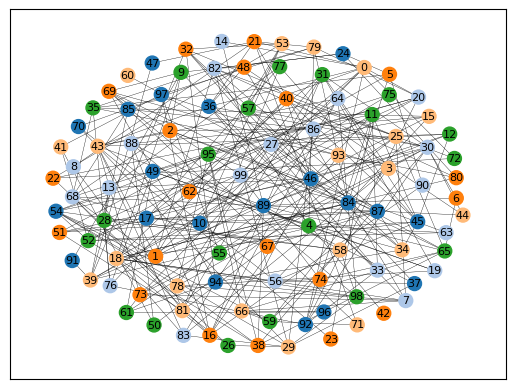

In [18]:
G = nx.gnp_random_graph(100, 0.05, seed=1)

print("Here is an equitable node-5-coloring of G,")
c = gcol.equitable_node_k_coloring(G, 5, opt_alg=2, it_limit=1000)
P = gcol.partition(c)
print("Largest color class has", max(len(j) for j in P), "nodes")
print("Smallest color class has", min(len(j) for j in P), "nodes")
nx.draw_networkx(
    G, 
    pos=nx.arf_layout(G), 
    node_color=gcol.get_node_colors(G, c), 
    node_size=100, 
    font_size=8, 
    width=0.25
)
plt.show()

The following example also determines an equitable node $5$-coloring for a random $G(100,0.05)$ graph. However, in this case, all nodes have been assigned weights randomly chosen from the set $\{1,2,\ldots,10\}$. The figure displays the weight of each node, and the text gives the total weight of each color class.

Here is an equitable node 5-coloring of the node-weighted graph G:
Weight of color class 0 = 115 [1, 2, 2, 3, 4, 6, 7, 8, 8, 8, 8, 9, 9, 10, 10, 10, 10]
Weight of color class 1 = 115 [1, 1, 2, 2, 3, 4, 4, 4, 4, 5, 7, 7, 7, 8, 9, 9, 9, 9, 10, 10]
Weight of color class 2 = 114 [1, 1, 1, 1, 3, 4, 5, 5, 6, 6, 7, 7, 7, 7, 8, 9, 9, 9, 9, 9]
Weight of color class 3 = 114 [1, 2, 2, 2, 3, 3, 4, 4, 4, 5, 6, 6, 7, 7, 8, 8, 8, 8, 8, 8, 10]
Weight of color class 4 = 114 [1, 1, 1, 1, 2, 3, 4, 4, 4, 5, 5, 5, 6, 6, 7, 7, 7, 8, 9, 9, 9, 10]


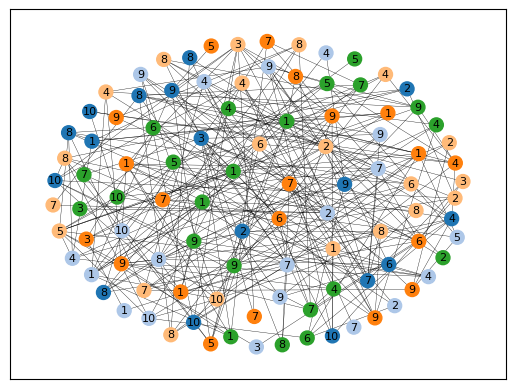

In [19]:
import random
random.seed(1)

H = nx.gnp_random_graph(100, 0.05, seed=1)
G = nx.Graph()
for u in H:
    G.add_node(u, weight=random.randint(1,10))
for u,v in H.edges():
    G.add_edge(u, v)

c = gcol.equitable_node_k_coloring(G, 5, weight="weight", opt_alg=2, it_limit=1000)
print("Here is an equitable node 5-coloring of the node-weighted graph G:")
P = gcol.partition(c)
for j in range(len(P)):
    Wj = sorted([G.nodes[v]["weight"] for v in P[j]])
    print("Weight of color class", j, "=", sum(Wj), Wj)
labels = {u: G.nodes[u]['weight'] for u in G.nodes}
nx.draw_networkx(
    G,
    pos=nx.arf_layout(G), 
    node_color=gcol.get_node_colors(G, c), 
    node_size=100, 
    font_size=8, 
    width=0.25, 
    labels=labels
)
plt.show()

The same process can also be followed to produce equitable edge $k$-colorings, as the following demonstrates using an edge-weighted graph.

Here is an equitable edge-3-coloring of the edge-weighted graph G,
Weight of color class 0 = 37 [1, 1, 2, 4, 4, 5, 5, 5, 5, 5]
Weight of color class 1 = 38 [1, 3, 3, 4, 4, 4, 4, 5, 5, 5]
Weight of color class 2 = 37 [2, 2, 3, 3, 3, 4, 5, 5, 5, 5]


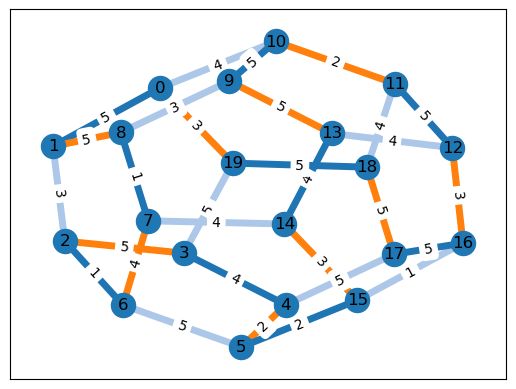

In [20]:
G = nx.dodecahedral_graph()
for u, v in G.edges():
    G.add_edge(u, v, edgeweight=random.randint(1,5))

c = gcol.equitable_edge_k_coloring(G, 3, weight="edgeweight", opt_alg=2, it_limit=1000)
print("Here is an equitable edge-3-coloring of the edge-weighted graph G,")
P = gcol.partition(c)
for j in range(len(P)):
    Wj = sorted([G.edges[e]["edgeweight"] for e in P[j]])
    print("Weight of color class", j, "=", sum(Wj), Wj)
    
pos = nx.spring_layout(G, seed=1)
nx.draw_networkx(G, pos=pos, edge_color=gcol.get_edge_colors(G, c), width=5)
labels = nx.get_edge_attributes(G,'edgeweight')
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=labels)
plt.show()

The next example shows an equitable face coloring using 6 colors. 

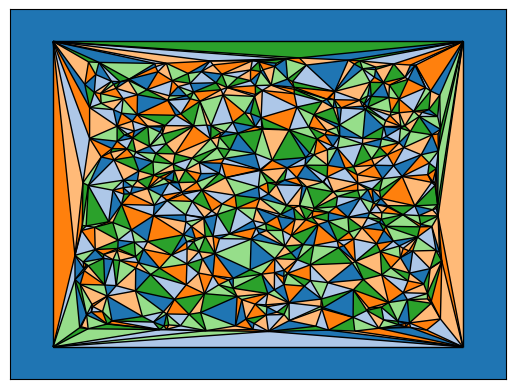

In [21]:
G = make_planar_graph(500, seed=1)
pos = nx.get_node_attributes(G, "pos")
c = gcol.equitable_face_k_coloring(G, pos, k=6)
gcol.draw_face_coloring(c, pos, True)
nx.draw_networkx(G, pos=pos, node_size=0, with_labels=False)
plt.show()

### Minimum Cost $k$-Coloring

Sometimes we will be seeking a node $k$-coloring, but are willing to allow some nodes to remain uncolored. This is particularly useful when using a value for $k$ that is less than the graph's chromatic number $\chi(G)$. In such cases, we are seeking to minimize the number of uncolored nodes, while ensuring that adjacent colored nodes never have the same color. We might also choose to add positive weights to the nodes, in which case we will seek to minimize the sum of the weights of the uncolored nodes.

The following example creates a node-weighted random graph and then produces a node 3-coloring solution using the routine ``gcol.min_cost_k_coloring()``. This solution has five uncolored nodes (shown in white) with a total weight of 14. In the visualization, node labels refer to node weights.

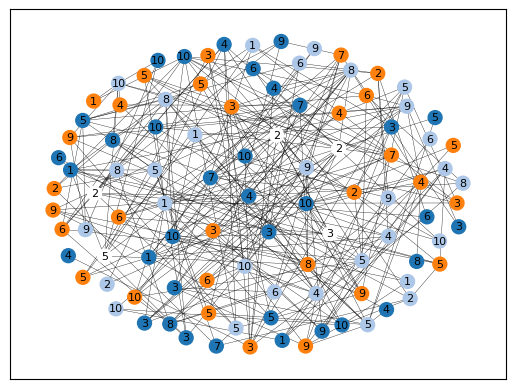

Uncolored nodes have weights [2, 2, 2, 3, 5] giving a total cost = 14


In [22]:
H = nx.gnp_random_graph(100, 0.05, seed=1)
G = nx.Graph()
for u in H:
    G.add_node(u, weight=random.randint(1,10))
for u,v in H.edges():
    G.add_edge(u, v)
labels = {u: G.nodes[u]['weight'] for u in G} 

c = gcol.min_cost_k_coloring(G, 3, weight="weight", weights_at="nodes", it_limit=1000)
nx.draw_networkx(
    G, 
    pos=nx.arf_layout(G), 
    node_color=gcol.get_node_colors(G, c), 
    node_size=100, 
    font_size=8, 
    width=0.25, 
    labels=labels
)
plt.show()
U = list(G.nodes[u]["weight"] for u in c if c[u] <= -1)
print("Uncolored nodes have weights", sorted(U), "giving a total cost =", sum(U))

In a similar fashion, we may prefer a solution in which all nodes are assigned to colors but are willing to allow some clashes in a solution (a clash occurs when the endpoints of an edge have the same color). The aim is to now $k$-color all nodes while minimizing the number of clashes. Again, we might also choose to add positive weights to the edges, in which case we will seek to minimize the sum of the weights of the clashing edges.

The following example creates a small edge-weighted graph and then produces a node 2-coloring using the routine ``gcol.min_cost_k_coloring()``. Six of the edges are causing a clash, giving a total weight of 11.

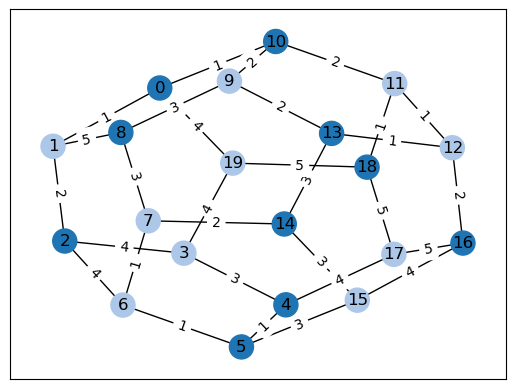

The following edges are causing clashes [(0, 10), (3, 19), (4, 5), (6, 7), (11, 12), (13, 14)] giving a total cost of 11


In [23]:
G = nx.dodecahedral_graph()
for u, v in G.edges():
    G.add_edge(u, v, edgeweight=random.randint(1,5))

c = gcol.min_cost_k_coloring(
    G, 2, 
    weight="edgeweight", 
    weights_at="edges", 
    it_limit=1000
)
pos = nx.spring_layout(G, seed=1)
nx.draw_networkx(G, pos=pos, node_color=gcol.get_node_colors(G, c))
labels = nx.get_edge_attributes(G,'edgeweight')
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=labels)
plt.show()

C = list( (u,v) for (u, v) in G.edges() if c[u]==c[v])
print("The following edges are causing clashes", C, "giving a total cost of", sum(G[u][v]["edgeweight"] for (u, v) in C))

## Kempe Chains and $s$-Chains

Given a node coloring of a graph, a [Kempe chain](https://en.wikipedia.org/wiki/Kempe_chain) is a connected component in the graph induced by nodes of two different colors, $i$ and $j$. Given a proper node coloring (that is, a coloring where no adjacent nodes have the same color), interchanging the colors of the nodes in a Kempe chain creates a new, proper coloring.

The following example takes a coloring ``c`` of a graph ``G`` and determines a red-yellow Kempe chain from node 5 (which is red). The nodes in the resultant Kempe chain are put in the set ``C``. A Kempe chain interchange is then performed, which swaps the colors of all nodes in ``C``, leading to the second solution shown.

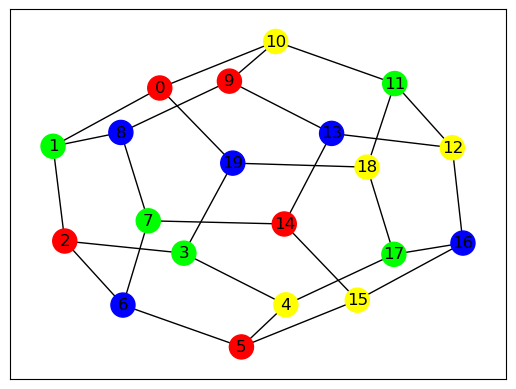

Above, the red-yellow Kempe chain from node 5 has nodes: {4, 5, 14, 15}
Interchanging the colors in this chain gives:


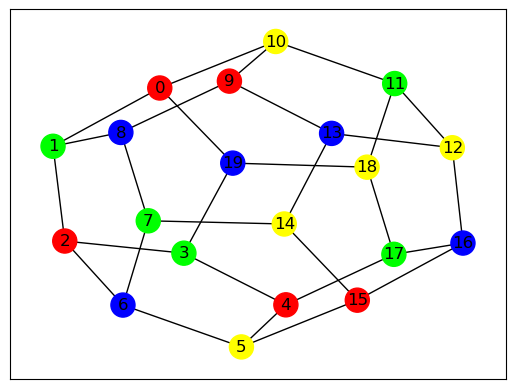

In [24]:
G = nx.dodecahedral_graph()
c = gcol.node_k_coloring(G, 4)
nx.draw_networkx(
    G, 
    pos=nx.spring_layout(G, seed=1), 
    node_color=gcol.get_node_colors(G, c, gcol.colorful)
)
plt.show()

i, j = 0, 3  # red, yellow
C = gcol.kempe_chain(G, c, 5, i, j)
print("Above, the red-yellow Kempe chain from node 5 has nodes:", C)
print("Interchanging the colors in this chain gives:")
for u in C:
    if c[u] == i:
        c[u] = j
    else:
        c[u] = i
nx.draw_networkx(
    G, 
    pos=nx.spring_layout(G, seed=1), 
    node_color=gcol.get_node_colors(G, c, gcol.colorful)
)
plt.show()

An $s$-chain is a generalization of a Kempe chain that allows more than two colors. Given a proper node coloring of a graph $G=(V,E)$, an $s$-chain is defined by a prescribed node $v\in V$ and sequence of unique colors $j_0,j_1,\ldots,j_{s-1}$, where the current color of $v$ is $j_0$. The result is the set of nodes that are reachable from $v$ in the digraph $G'=(V',A)$ in which 

* $V' = \{u \; : \; u \in V \; \wedge \; c(u) \in \{j_0,j_1,\ldots,j_{s-1}\}\}$, and
* $A = \{(u,w) \; : \; \{u,w\} \in E \; \wedge \; c(u) = j_i \; \wedge \; c(w) = j_{(i+1) \bmod s} \}$,

where $c(u)$ gives the color of node $u$. In a proper coloring, interchanging the colors of all nodes in an $s$-chain via the following mapping

* $j_i \leftarrow j_{(i+1) \bmod s}$

results in a new proper coloring. 

The following code shows an example of this. Here, an $s$-chain is generated in the coloring using node 4 and colors 0, 1, and 3 (red, green, and yellow respectively). The described color mapping is then used to interchange the colors on this $s$-chain, giving the coloring shown below. 

The s-chain for node 4 with color sequence [0, 1, 3] is {17, 18, 3, 4}
Interchanging the colors on this chain using {0: 1, 1: 3, 3: 0} gives:


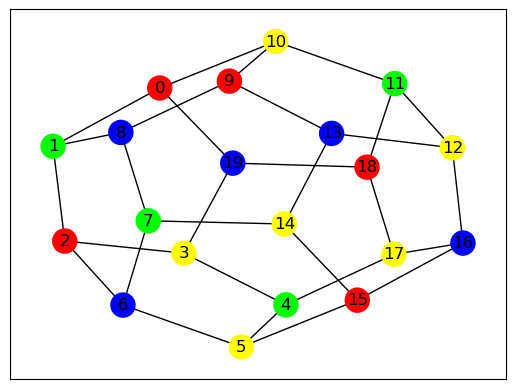

In [25]:
L = [0, 1, 3]  # red, green, yellow
C = gcol.s_chain(G, c, 4, L)
print("The s-chain for node 4 with color sequence", L, "is", C)

color_map = {L[j]: L[(j+1) % len(L)] for j in range(len(L))}
for u in C:
    c[u] = color_map[c[u]]

print("Interchanging the colors on this chain using", color_map, "gives:")
nx.draw_networkx(
    G, 
    pos=nx.spring_layout(G, seed=1), 
    node_color=gcol.get_node_colors(G, c, gcol.colorful)
)
plt.show()

## Independent Sets, Cliques and Coverings

In the final section of this chapter, we show how the ``gcol`` library can be used to find (possibly approximate) solutions to the following three NP-hard optimization problems. 

* The *maximum independent set problem* involves determining the largest subset of nodes in a graph $G$ such that none of the nodes in this set are neighboring. The size of the largest independent set in $G$ is known as the *independence number*, denoted by $\alpha(G)$.
* The *minimum node cover problem* involves determining the smallest subset of nodes in $G$ such that every edge in the graph has at least one endpoint from this set. 
* The *maximum clique problem* involves determining the largest subset of nodes in $G$ such that every pair of nodes in this set is adjacent. The size of the largest clique in a graph $G$ is known as the *clique number*, denoted by $\omega(G)$. 

We can also define weights on the nodes, if desired. If these cases the aims are to now maximize (or minimize) the sum of the weights of the selected nodes. 

The following example demonstrates how a large independent set of nodes can be determined by the ``gcol.max_independent_set()`` method. Here, we use a graph in which nodes represent different characters in the play [Les Miserables](https://en.wikipedia.org/wiki/Les_Mis%C3%A9rables). Edges between nodes then indicate pairs of characters that appear in the same scenes together.

In Les Miserables, there is a subset of 35 characters who never meet.


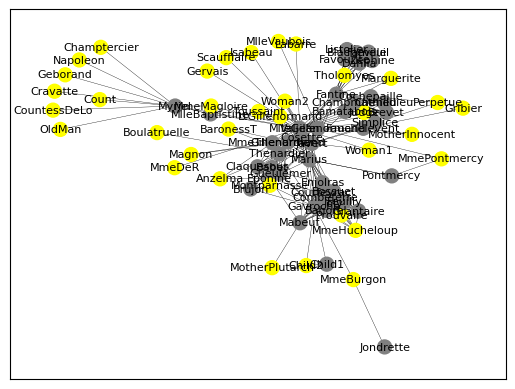

In [26]:
G = nx.les_miserables_graph()
S = gcol.max_independent_set(G, it_limit=10000)
print("In Les Miserables, there is a subset of", len(S), "characters who never meet.")
nx.draw_networkx(
    G, 
    nx.spring_layout(G, seed=1), 
    node_color=gcol.get_set_colors(G, S), 
    node_size=100, 
    font_size=8, 
    width=0.25
)
plt.show()

In the above, the members of the independent set, whose size we have tried to maximize, are shown in yellow. The set of grey nodes, whose size has been minimized, gives us a node covering. Hence, we have determined solutions to both problems.

Large cliques can also be found by using the ``gcol.max_independent_set()`` routine on the graph's complement. A demonstration of this is shown below.

In the set of 77 Les Miserables characters, there is a subset of 10 characters who form a clique. These are ['Combeferre', 'Feuilly', 'Mabeuf', 'Bahorel', 'Joly', 'Courfeyrac', 'Bossuet', 'Enjolras', 'Marius', 'Gavroche']


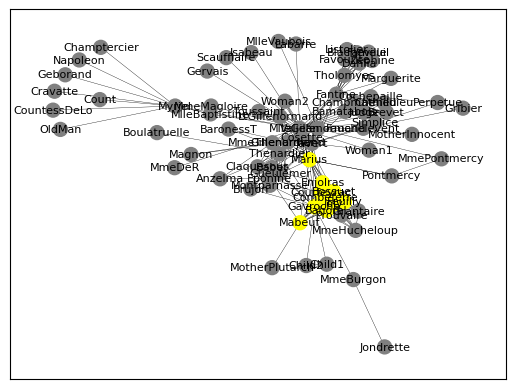

In [27]:
S = gcol.max_independent_set(nx.complement(G), it_limit=10000)
print("In the set of", len(G), "Les Miserables characters, there is a subset of",
      len(S), "characters who form a clique. These are", S)
nx.draw_networkx(
    G, 
    nx.spring_layout(G, seed=1), 
    node_color=gcol.get_set_colors(G, S), 
    node_size=100, 
    font_size=8, 
    width=0.25
)
plt.show()